## Springboard DAC Capstone 2: <span style="color:blue">Consumer Spending Habits in 2015</span>

### Overview
One of the leading past times for any population is purchasing material goods or “shopping”.  Spending habits for consumers vary across the globe with numerous companies taking advantage of key insights to determine profitable products to invest their resources in.  These details that impact product performance can be information on the customer age range, gender groups, product categories, unit cost, unit price, etc.  

Areas of Concern to Address:
 - A)	Product Category Revenues (cost per unit vs price per unit)
 - B)	Most Influential Consumer Detail for Products (ex: Age, Gender, Product Categories, etc.)
 
#### Question
 - What are the top (3) performing products, from 2015 to 2016, that companies should allocate resources to the following year?

### Step 1: <span style="color:green">Importing Libraries</span> 

In [5]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import matplotlib as mpl
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
sns.set_style("darkgrid")
mpl.rcParams['figure.figsize'] = (20,5)

### Step 2: <span style="color:green">Importing CSV file</span> 

In [6]:
df = pd.read_csv("SalesForCourse_quizz_table.csv")
df.describe()

,index,Year,Customer Age,Quantity,Unit Cost,Unit Price,Cost,Revenue,Column1
count,34867.000000,34866.000000,34866.000000,34866.000000,34866.000000,34866.000000,34866.000000,34867.000000,2574.000000
mean,17433.000000,2015.569237,36.382895,2.002524,349.880567,389.232485,576.004532,640.870093,688.054913
std,10065.380254,0.495190,11.112902,0.813936,490.015846,525.319091,690.500395,736.640033,774.200897
min,0.000000,2015.000000,17.000000,1.000000,0.670000,0.666667,2.000000,2.000000,2.000000
25%,8716.500000,2015.000000,28.000000,1.000000,45.000000,53.666667,85.000000,102.000000,104.250000
50%,17433.000000,2016.000000,35.000000,2.000000,150.000000,179.000000,261.000000,319.000000,390.500000
75%,26149.500000,2016.000000,44.000000,3.000000,455.000000,521.000000,769.000000,902.000000,975.750000
max,34866.000000,2016.000000,87.000000,3.000000,3240.000000,5082.000000,3600.000000,5082.000000,3681.000000


In [7]:
df.head()

,index,Date,Year,Month,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Cost,Revenue,Column1
0,0,02/19/16,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,1.0,80.00,109.000000,80.0,109.0,NaN
1,1,02/20/16,2016.0,February,29.0,F,United States,Washington,Clothing,Gloves,2.0,24.50,28.500000,49.0,57.0,NaN
2,2,02/27/16,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,3.67,5.000000,11.0,15.0,NaN
3,3,03/12/16,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,2.0,87.50,116.500000,175.0,233.0,NaN
4,4,03/12/16,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,35.00,41.666667,105.0,125.0,NaN


### Step 3: <span style="color:green">Revenues</span> 

In [8]:
#How much revenue was earned per month?
monthly_revenues = df.groupby(df['Month'])['Revenue'].sum().sort_values(ascending = False)
print(monthly_revenues)

Month
June         2681985.0
May          2625820.0
April        2200490.0
March        2135336.0
December     2116097.0
February     1994233.0
January      1950621.0
November     1438928.0
October      1376969.0
September    1295246.0
July         1280666.0
August       1248185.0
Name: Revenue, dtype: float64


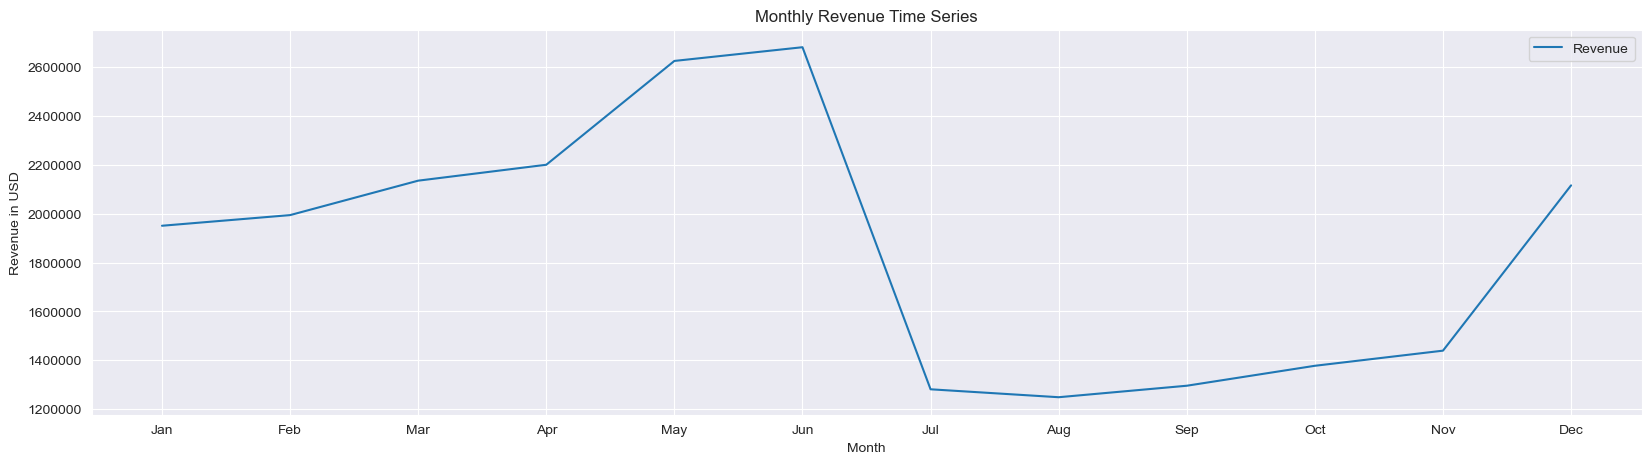

In [9]:
#Time Series of Monthly Revenue
month_values = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep','Oct', 'Nov', 'Dec']
rev_values = [1950621, 1994233, 2135336, 2200490, 2625820, 2681985, 1280666, 1248185, 1295246, 1376969, 1438928, 2116097]
plt.plot(month_values, rev_values, label = 'Revenue')
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('Month')
plt.ylabel('Revenue in USD')
plt.title('Monthly Revenue Time Series')
plt.legend()

plt.show()

In [10]:
#How much revenue was earned per product category?
product_revenues = df.groupby(df['Product Category'])['Revenue'].sum().sort_values(ascending = False)
print(product_revenues)

Product Category
Bikes          11486355.0
Accessories     7420664.0
Clothing        3437557.0
Name: Revenue, dtype: float64


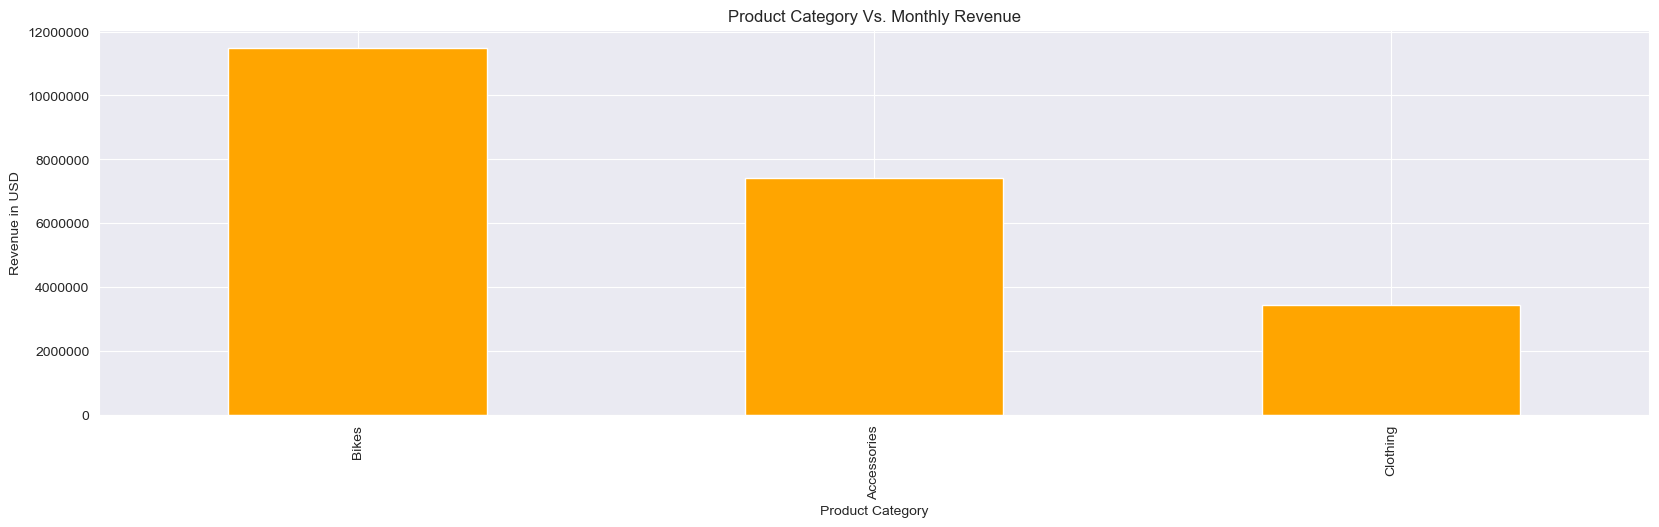

In [11]:
#Product Category Revenue As Bar Chart
product_revenues.plot(kind = 'bar', color = 'orange', title = 'Product Category Vs. Monthly Revenue', ylabel = 'Revenue in USD')
plt.ticklabel_format(style='plain', axis='y')

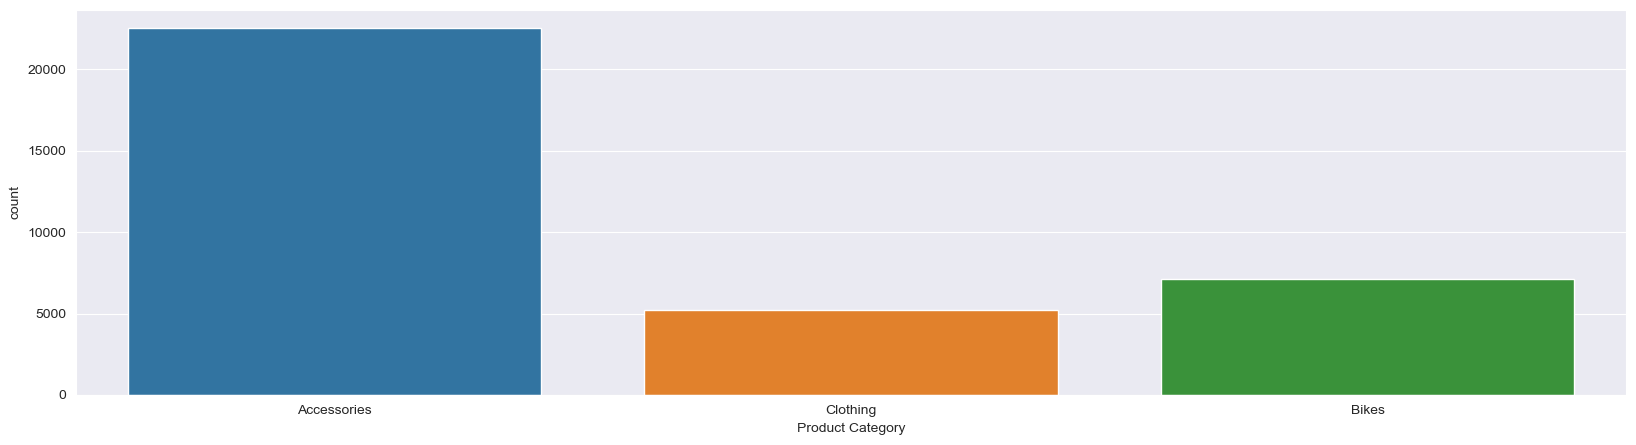

In [12]:
#Quantity of each product item sold (Bar Chart)?
sns.countplot(x = 'Product Category', data = df)
plt.show()

In [13]:
#How much revenue was earned per product sub category?
sub_revenues = df.groupby(df['Sub Category'])['Revenue'].sum().sort_values(ascending = False)
print(sub_revenues)

Sub Category
Mountain Bikes       5176456.0
Road Bikes           3921989.0
Tires and Tubes      2865915.0
Helmets              2738210.0
Touring Bikes        2387910.0
Jerseys              1834110.0
Bottles and Cages     709407.0
Shorts                689184.0
Hydration Packs       403276.0
Vests                 368681.0
Fenders               329204.0
Caps                  255992.0
Gloves                228353.0
Bike Stands           150911.0
Bike Racks            140854.0
Cleaners               82887.0
Socks                  61237.0
Name: Revenue, dtype: float64


### Step 4: <span style="color:green">Profits</span>

In [14]:
#How much profit was earned per month?
df['Profit'] =df['Unit Price'] - df['Unit Cost']
monthly_profits = df.groupby(df['Month'])['Profit'].sum().sort_values(ascending = False).round(decimals=1)
print(monthly_profits)

Month
May          214925.7
June         211837.8
April        180719.0
March        180232.0
January      167586.9
February     153928.0
July          75485.4
December      41996.6
October       40584.8
August        38268.6
September     34440.1
November      32038.9
Name: Profit, dtype: float64


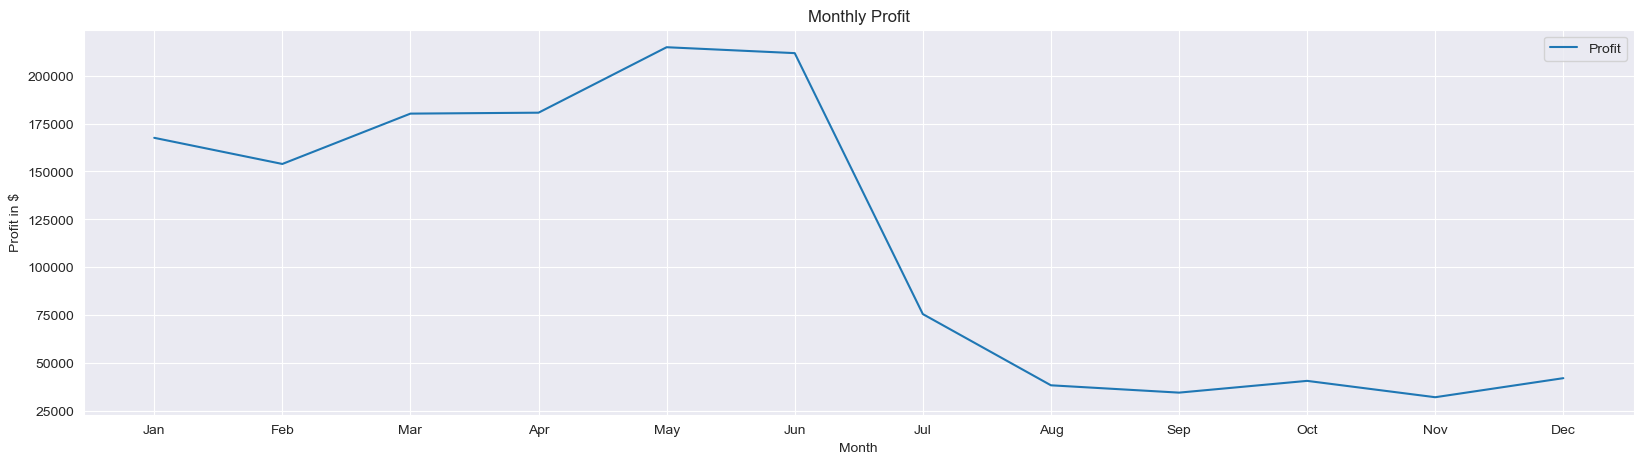

In [15]:
#Time Series of Monthly Profit
month_values = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep','Oct', 'Nov', 'Dec']
rev_values = [167586.9, 153928.0, 180232.0, 180719.0, 214925.7, 211837.8, 75485.4, 38268.6, 34440.1, 40584.8, 32038.9, 41996.6]

plt.plot(month_values, rev_values, label='Profit')
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('Month')
plt.ylabel('Profit in $')
plt.title("Monthly Profit")
plt.legend()

plt.show()

In [16]:
#How much profit was earned per product category?
product_profits = df.groupby(df['Product Category'])['Profit'].sum().sort_values(ascending = False).round(decimals=1)
print(product_profits)

Product Category
Accessories    839366.8
Clothing       330098.7
Bikes          202578.5
Name: Profit, dtype: float64


<AxesSubplot:title={'center':'Product Category Vs. Profit'}, xlabel='Product Category', ylabel='Profit in USD'>

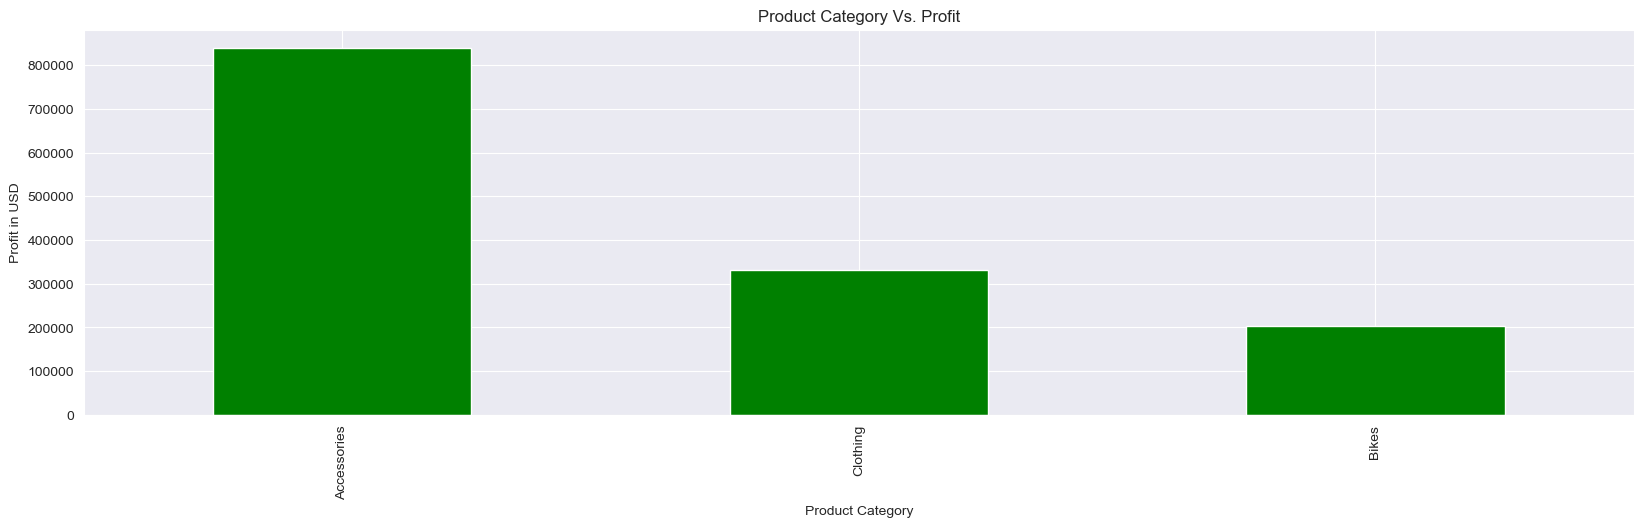

In [17]:
#Product Category Profit As Bar Chart
product_profits.plot(kind = 'bar', color = 'green', title = 'Product Category Vs. Profit', ylabel = 'Profit in USD')

In [18]:
#How much profit was earned per product sub category?
sub_profits = df.groupby(df['Sub Category'])['Profit'].sum().sort_values(ascending = False).round(decimals=1)
print(sub_profits)

Sub Category
Helmets              311539.8
Tires and Tubes      310110.7
Jerseys              180781.4
Mountain Bikes        91207.8
Bottles and Cages     79042.3
Road Bikes            55740.0
Touring Bikes         55630.6
Shorts                53527.8
Fenders               46372.9
Hydration Packs       46247.8
Vests                 34934.8
Gloves                28797.2
Caps                  26539.2
Bike Racks            22561.5
Bike Stands           14628.3
Cleaners               8863.5
Socks                  5518.3
Name: Profit, dtype: float64


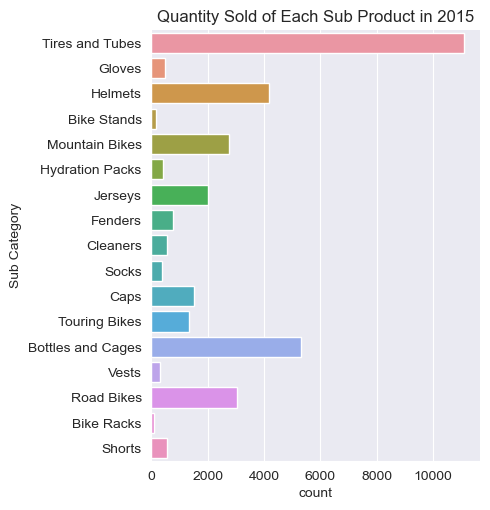

In [19]:
#Quanity of each sub product sold?
sns.catplot(y="Sub Category", data= df, kind= "count")
plt.title('Quantity Sold of Each Sub Product in 2015')
plt.show()

### Step 5: <span style="color:green">Country</span>

In [20]:
#How much revenue and profit was earned between each country?
country_rev_pro = df.groupby(df['Country'])['Revenue','Profit'].sum().sort_values(by='Profit', ascending= False).round(decimals=1)
print(country_rev_pro)

                   Revenue    Profit
Country                             
Germany          4244510.0  588341.5
United States   10377742.0  427916.6
United Kingdom   4276220.0  198883.9
France           3446104.0  156901.9


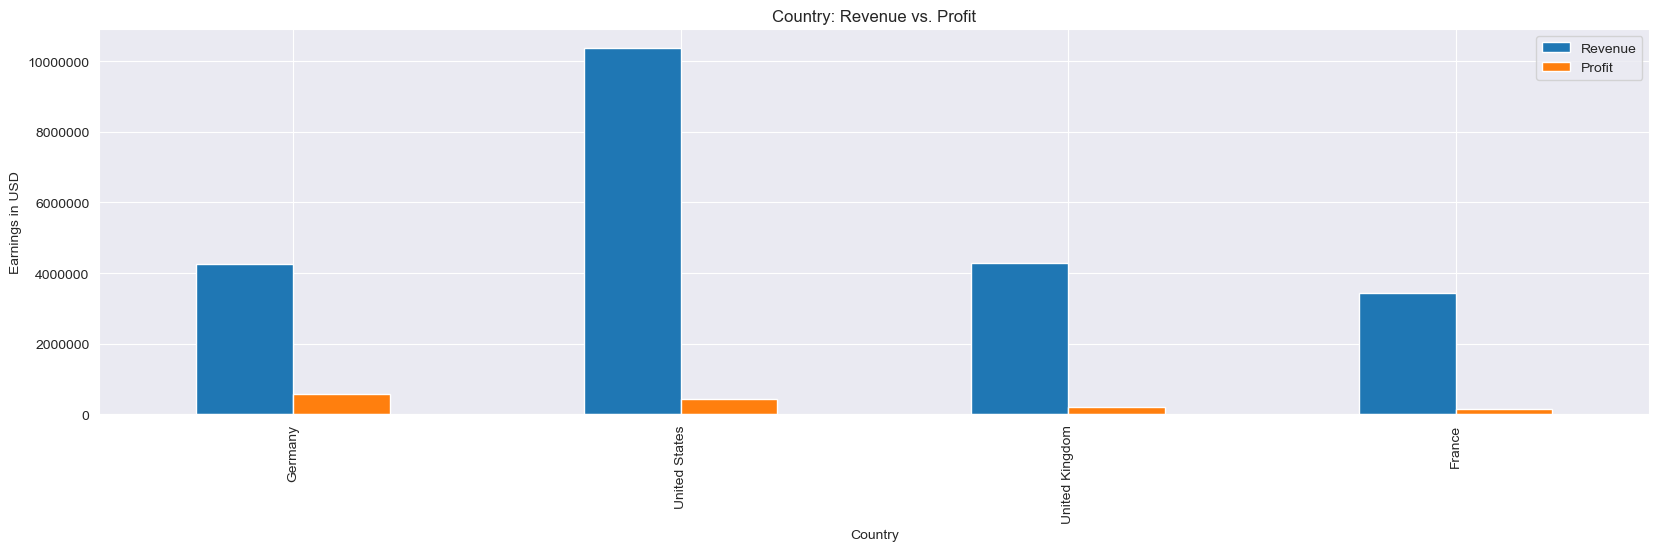

In [21]:
#Country Revenue & Profits As Bar Chart
country_rev_pro.plot(kind="bar")
plt.ticklabel_format(style='plain', axis='y')
plt.title('Country: Revenue vs. Profit')
plt.ylabel("Earnings in USD")
plt.show()

### Step 6: <span style="color:green">Gender</span>

In [26]:
#Does a customer's gender impact revenue?
gender_rev = df.groupby(['Product Category','Customer Gender'])['Revenue'].sum().sort_values(ascending= False).round(decimals=1)
print(gender_rev)

Product Category  Customer Gender
Bikes             M                  5757574.0
                  F                  5728781.0
Accessories       M                  3837106.0
                  F                  3583558.0
Clothing          M                  1817262.0
                  F                  1620295.0
Name: Revenue, dtype: float64


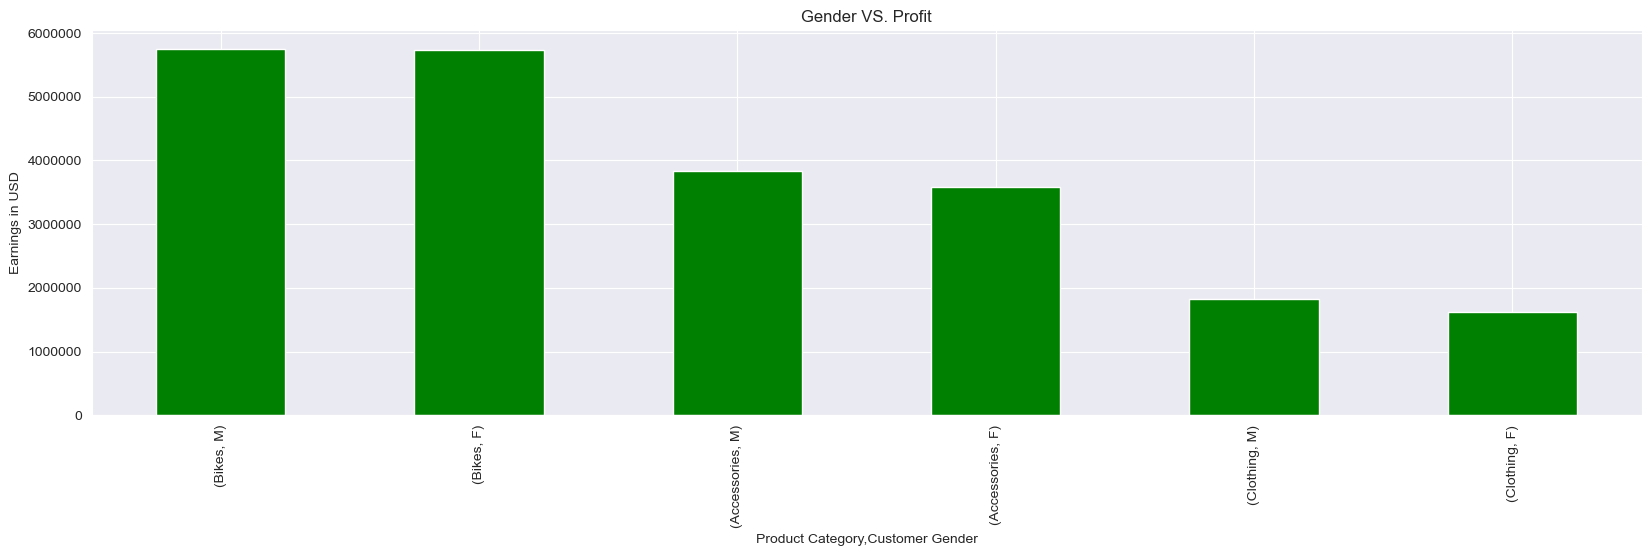

In [31]:
#Customer's Gender Revenue AS Bar Chart
gender_rev.plot(kind='bar', color = 'green')
plt.ticklabel_format(style='plain', axis='y')
plt.title('Gender VS. Profit')
plt.ylabel("Earnings in USD")
plt.show()

In [29]:
#Does a customer's gender impact profit?
gender_pro = df.groupby(['Product Category','Customer Gender'])['Profit'].sum().sort_values(ascending= False).round(decimals=1)
print(gender_pro)

Product Category  Customer Gender
Accessories       M                  436887.1
                  F                  402479.7
Clothing          M                  177791.5
                  F                  152307.2
Bikes             F                  106649.9
                  M                   95928.6
Name: Profit, dtype: float64


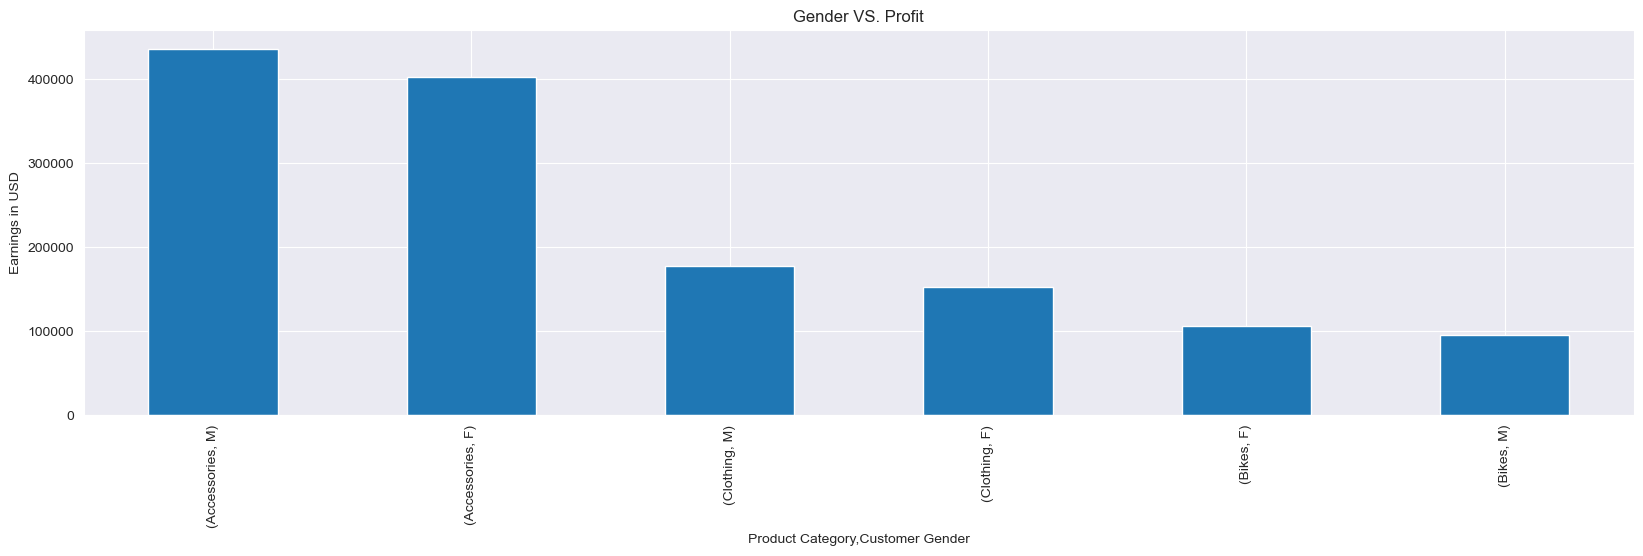

In [32]:
#Customer's Gender Profit AS Bar Chart
gender_pro.plot(kind='bar')
plt.ticklabel_format(style='plain', axis='y')
plt.title('Gender VS. Profit')
plt.ylabel("Earnings in USD")
plt.show()

### Step 7: <span style="color:green">Age</span>

In [25]:
#Does a customer's age impact earnings?  Are there any specific age groups that promote more earnings?
age_rev_pro = df.groupby(df['Customer Age'])['Revenue','Profit'].sum().sort_values(by='Profit', ascending= False).round(decimals=1)
age_rev_pro.head(5)

,Revenue,Profit
Customer Age,,
40.0,781298.0,52598.7
34.0,888480.0,51236.5
31.0,935020.0,50213.2
32.0,770209.0,49196.6
35.0,781293.0,48078.1


### Conclusion: <span style="color:green">Where should companies allocate their resources next year?</span>

Top Products: **Accessories & Clothing Product** Categories for **Profits**


Top Products (three): **Helmets, Tires & Tubes, Jerseys**


Influential Consumer Details:

 - Priority months are between January – June, with emphasis on **May and June**. 
 - Attract **Male gender** products – Higher Revenues (sales) and Profit Margins.
 - Between **35 - 40** years old.
 - Distribute products to the **United States and Germany** – These countries hold the highest profit yields and revenue values.